In [1]:
!pip install selenium

     ---------------------------------------- 6.3/6.3 MB 122.7 kB/s eta 0:00:00
     ------------------------------------ 384.9/384.9 kB 106.1 kB/s eta 0:00:00
     --------------------------------------- 58.3/58.3 kB 87.8 kB/s eta 0:00:00


In [13]:

import pandas as pd
import time
import csv

In [4]:
url = "https://www.amazon.fr/Global-Keratin-GKH-AC-100-30-Serum-50ml/product-reviews/B0041R7C4A/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [13]:
pip install webdriver-manager selenium

Note: you may need to restart the kernel to use updated packages.


In [5]:

import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

from webdriver_manager.chrome import ChromeDriverManager


driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [6]:
driver.get(url)

In [7]:
name_list = []
titles_list = [] 
reviews_list = [] 

for i in range(0, 10):
  # Extract reviewer names.
  names = driver.find_elements(By.XPATH, "(//span[@class='a-profile-name'])")
  for name in range(len(names)):
    name_list.append(names[name].text)

  # Extract review title.
  review_names = driver.find_elements(By.XPATH, "(//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']/span)") 
  for review in range(len(review_names)):
    titles_list.append(review_names[review].text)

  # Extract reviews.  
  reviews = driver.find_elements(By.XPATH, "(//span[@class='a-size-base review-text review-text-content']/span)") 
  for review in range(len(reviews)):
    reviews_list.append(reviews[review].text)      

  #driver.find_element(By.XPATH, "//li[@class='a-last']/a").click()
  time.sleep(2)
  
driver.quit()

In [8]:
len(name_list)

120

In [9]:
len(titles_list)

100

In [10]:
len(reviews_list)

100

In [11]:
#Combine the lists.
data =list( zip(name_list, titles_list, reviews_list))

In [14]:
#Create the data frame.
reviews = pd.DataFrame(data,columns=['Reviewer', 'Review Title', 'Review'])
reviews.head(5)

,Reviewer,Review Title,Review
0,julie,Fait son job,Très bonne huile hydratante. Pas trop grasse
1,Client Amazon,Sent bon,Sans emballage il est arrivé dévissé et c'est ...
2,julie,Sérum magique,"Pour moi c'est le seul parfait. Il nourrit, hy..."
3,Client Amazon,Je recommande,Quelques problèmes au niveau de la livraison m...
4,Lilou,Bien trop cher pour ce que c'est !!,Je mets rârement des revues négatives mais on ...


In [75]:
reviews.to_csv('gk_hair_review.csv', index=False, header=True)

In [15]:
only_reviews = reviews.iloc[:, 2].values

In [16]:
gk_hair_reviews = pd.DataFrame({'reviews': only_reviews})
gk_hair_reviews.head(5)

,reviews
0,Très bonne huile hydratante. Pas trop grasse
1,Sans emballage il est arrivé dévissé et c'est ...
2,"Pour moi c'est le seul parfait. Il nourrit, hy..."
3,Quelques problèmes au niveau de la livraison m...
4,Je mets rârement des revues négatives mais on ...


In [17]:
#Let's apply sentimental analysis using VADER(Valence Aware Dictionary for Sentiment Reasoning)

# Initialize the SentimentIntensityAnalyzer.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kuissu_Nathalie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
# Apply lambda function to get compound scores.
function = lambda title: vader.polarity_scores(title)['compound']
gk_hair_reviews['compound'] = gk_hair_reviews['reviews'].apply(function)
gk_hair_reviews.head(5)

,reviews,compound
0,Très bonne huile hydratante. Pas trop grasse,0.0000
1,Sans emballage il est arrivé dévissé et c'est ...,0.0000
2,"Pour moi c'est le seul parfait. Il nourrit, hy...",0.0000
3,Quelques problèmes au niveau de la livraison m...,-0.1280
4,Je mets rârement des revues négatives mais on ...,-0.5093


In [21]:
# Word cloud visualization.
!pip install wordcloud
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

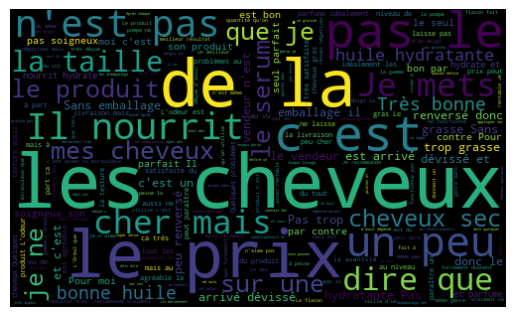

In [22]:
allWords = ' '.join([twts for twts in gk_hair_reviews['reviews']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [23]:
def getAnalysis(score):
 if score < 0:
    return 'Negative'
 elif score == 0:
    return 'Neutral'
 else:
    return 'Positive'

gk_hair_reviews['sentiment'] = gk_hair_reviews['compound'].apply(getAnalysis)

gk_hair_reviews.head(5)

,reviews,compound,sentiment
0,Très bonne huile hydratante. Pas trop grasse,0.0000,Neutral
1,Sans emballage il est arrivé dévissé et c'est ...,0.0000,Neutral
2,"Pour moi c'est le seul parfait. Il nourrit, hy...",0.0000,Neutral
3,Quelques problèmes au niveau de la livraison m...,-0.1280,Negative
4,Je mets rârement des revues négatives mais on ...,-0.5093,Negative


In [24]:
gk_hair_reviews['sentiment'].value_counts()

Neutral     60
Negative    20
Positive    20
Name: sentiment, dtype: int64

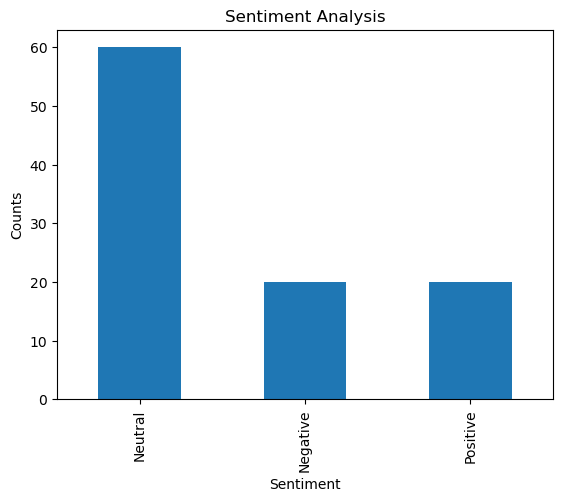

In [25]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
gk_hair_reviews['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

Text(0, 0.5, 'GK hair Reviews Sentiment')

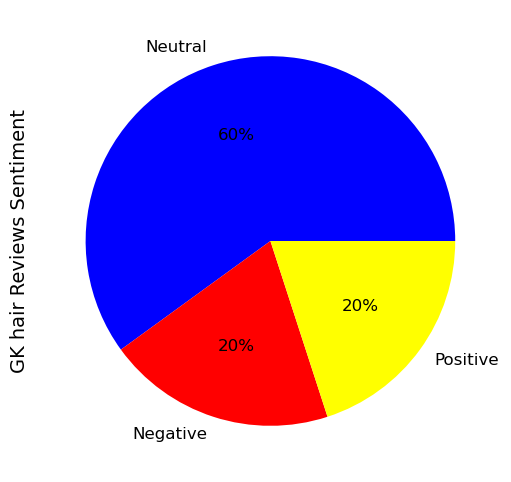

In [26]:
gk_hair_reviews.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',  fontsize=12, figsize=(9,6), colors=["blue", "red", "yellow"])
plt.ylabel("GK hair Reviews Sentiment", size=14)

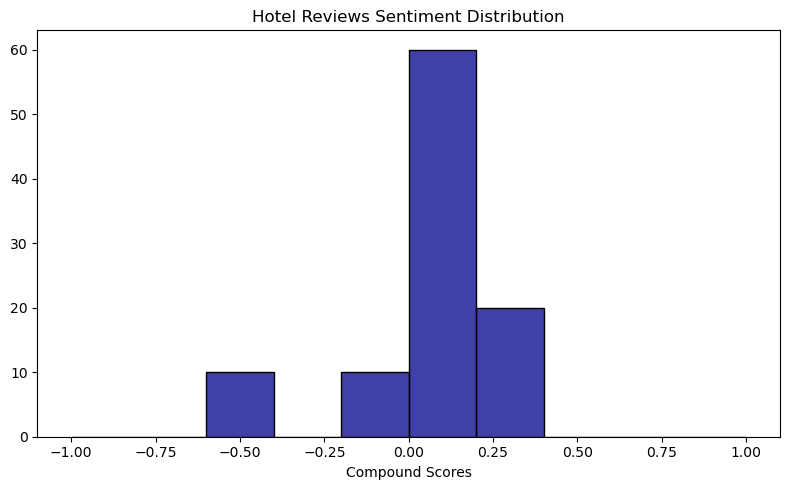

In [90]:
plt.figure(figsize=(8, 5))
sns.histplot(gk_hair_reviews, x='compound', color="darkblue", bins=10, binrange=(-1, 1))
plt.title("Hotel Reviews Sentiment Distribution")
plt.xlabel("Compound Scores")
plt.ylabel("")
plt.tight_layout()

In [91]:
pip install anvil-uplink

     --------------------------------------- 88.0/88.0 kB 16.6 kB/s eta 0:00:00
     --------------------------------------- 51.4/51.4 kB 13.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=2dffd46a78a9f2e71f7055df231420564d0d5f1df42e668103e5bbddec7531ea
  Stored in directory: c:\users\kuissu_nathalie\appdata\local\pip\cache\wheels\e8\9d\fd\0a594a1bc8d493935d319ac40d64d79f5b4117ef4d37b1b678
Successfully built ws4py
Note: you may need to restart the kernel to use updated packages.


In [27]:
import anvil.server
from anvil.tables import app_tables

anvil.server.connect("JW7URG5I6GRZLQSIKKXZSQDQ-YH2SUIUGQFNKHJE7")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [32]:
for i, row in gk_hair_reviews.iterrows():
    #while i<len(data)
    app_tables.gkhairreview.add_row(reviews=row['reviews'],
                               compound=row['compound'],
                               sentiment=row['sentiment'])

Exception in thread Thread-9:
Traceback (most recent call last):
  File "C:\Users\Kuissu_Nathalie\anaconda3\lib\site-packages\anvil\server.py", line 405, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "C:\Users\Kuissu_Nathalie\anaconda3\lib\site-packages\anvil\server.py", line 395, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "C:\Users\Kuissu_Nathalie\anaconda3\lib\site-packages\anvil\_threaded_server.py", line 435, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Kuissu_Nathalie\anaconda3\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "C:\Users\Kuissu_Nathalie\anaconda3\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kuissu_Nathalie\anaconda3\li

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER
